# Cabinet Start-Up Procedure

1. Turn on cabinet power in back of cabinet
2. Turn on sensor power (24 Volts). The sensor power inputs are labeled.
3. Compile code to AMDC
4. Turn on power to DC bus of cabinet.
5. Run Jupyter Notebook. 

Import neccessary modules

In [68]:
amdc.disconnect()

In [69]:
from Cabinet_Test import cmd

import sys
sys.path.append(r'..\AMDC-Firmware\scripts')
from AMDC import AMDC
amdc = AMDC(port = 'COM13', cmdEcho = True, printOutput=True)
Vdc = 40
cmd = cmd(Vdc, amdc, debug = False) 

	> cabinet setup 40.00000
['cabinet setup 40.00000', 'SUCCESS']
	> cabinet init_cb
['cabinet init_cb', 'FAILURE']


In [70]:
cmd.disable_pwm()

	> hw pwm off
['hw pwm off', 'SUCCESS']


In [71]:
cmd.BIM_init()
cmd.BIM_set_Vdc(40)
cmd.BIM_set_id(10)
cmd.enable_pwm()
cmd.BIM_enable_ctrl()



	> BIM init
['BIM initENC:\tSetting pulses per rev bits = 10...', '', 'SUCCESS']
	> BIM set_vdc 40.000000
['BIM set_vdc 40.000000', 'SUCCESS']
	> BIM set_id 10.000000
['BIM set_id 10.000000', 'SUCCESS']
	> hw pwm on
['hw pwm on', 'SUCCESS']
	> BIM enable_ctrl
['BIM enable_ctrl', 'SUCCESS']


In [72]:
PI = 3.1415926
#cmd.BIM_set_theta_offset(-PI/12)
#logger.clear_all()

cmd.BIM_enable_ob()
cmd.BIM_enable_vctrl()
cmd.BIM_set_id(13.5)
#logger.start()
#cmd.BIM_set_Fxy(0,3)
cmd.BIM_set_deltaxy(0, 0)
cmd.BIM_enable_levctrl()
#time.sleep(6)
#logger.stop()
#cmd.BIM_set_id(10)
#data = logger.dump(file = 'BIM_data_start.csv')

	> BIM enable_ob
['BIM enable_ob', 'SUCCESS']
	> BIM enable_vctrl
['BIM enable_vctrl', 'SUCCESS']
	> BIM set_id 13.500000
['BIM set_id 13.500000', 'SUCCESS']
	> BIM set_deltaxy 0.000000 0.000000
['BIM set_deltaxy 0.000000 0.000000', 'SUCCESS']
	> BIM enable_levctrl
['BIM enable_levctrl', 'SUCCESS']


In [73]:
#import matplotlib
import time

import pathlib as pl
import sys
repo_dir = '..'                                      # CHANGE THIS TO YOUR REPO DIRECTORY
repo_dir = pl.Path(repo_dir)

from AMDC_Logger import AMDC_Logger, find_mapfile
mapfile_path = find_mapfile(repo_dir)
logger = AMDC_Logger(AMDC = amdc, mapfile = mapfile_path)
logger.sync()

# View which variables are logged
logger.info()
#amdc.connect()
cmd.enable_log()

	> log info
	> log info
###################   AMDC LOGGER INFO   ###################

Variable Name:      Index:         Type:         Sample Rate [Hz]:    Number of Samples:
LOG_delta_x           0            double             10000.0               4140     
LOG_delta_y           1            double             10000.0               4140     
LOG_F_x               2            double             10000.0               4140     
LOG_F_y               3            double             10000.0               4140     
LOG_Is1_x             4            double             10000.0               4140     
LOG_Is1_y             5            double             10000.0               4140     
LOG_Is1_x_ref         6            double             10000.0               4140     
LOG_Is1_y_ref         7            double             10000.0               4140     
LOG_Itq_d_ref         8            double             10000.0               4140     
LOG_Itq_q_ref         9            double          

In [74]:
logger.unregister_all()
#logger.register('Ia1_a Ia1_b Ia1_c Ib1_a Ib1_b Ib1_c Ia2_a Ia2_b Ia2_c Ib2_a Ib2_b Ib2_c', samples_per_sec = 1000, var_type = 'double')
#logger.register('theta_rm wrm wsl theta_e we Itq_d_ref Itq_q_ref Itq_d Itq_q Te', samples_per_sec = 1000, var_type = 'double')
#logger.register('theta_rm theta_e wsl', samples_per_sec = 1000, var_type = 'double')
#logger.register('wsl wrm theta_e theta_rm Itq_d_ref Itq_q_ref Itq_d Itq_q va1_ref vb1_ref vc1_ref va2_ref vb2_ref vc2_ref Is1_x Is1_y Is1_x_ref Is1_y_ref delta_x delta_y', samples_per_sec = 1000, var_type = 'double')
#logger.register('Is1_x Is1_y Is1_x_ref Is1_y_ref delta_x delta_y', samples_per_sec = 1000, var_type = 'double')
#logger.register('delta_x delta_y delta_x_ref delta_y_ref delta_x_ref_lpf delta_y_ref_lpf Is1_x Is1_y Is1_x_ref Is1_y_ref', samples_per_sec = 1000, var_type = 'double')
#logger.register('wrm Itq_d_ref Itq_q_ref Itq_d Itq_q Is1_x Is1_y Is1_x_ref Is1_y_ref', samples_per_sec = 1000, var_type = 'double')
logger.register('delta_x delta_y F_x F_y Is1_x Is1_y Is1_x_ref Is1_y_ref Itq_d_ref Itq_q_ref Itq_d Itq_q', samples_per_sec = 10000, var_type = 'double')
#logger.register('delta_x delta_y', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()


	> log unreg 0
['log unreg 0', 'SUCCESS']
	> log unreg 1
['log unreg 1', 'SUCCESS']
	> log unreg 2
['log unreg 2', 'SUCCESS']
	> log unreg 3
['log unreg 3', 'SUCCESS']
	> log unreg 4
['log unreg 4', 'SUCCESS']
	> log unreg 5
['log unreg 5', 'SUCCESS']
	> log unreg 6
['log unreg 6', 'SUCCESS']
	> log unreg 7
['log unreg 7', 'SUCCESS']
	> log unreg 8
['log unreg 8', 'SUCCESS']
	> log unreg 9
['log unreg 9', 'SUCCESS']
	> log unreg 10
['log unreg 10', 'SUCCESS']
	> log unreg 11
['log unreg 11', 'SUCCESS']
	> log reg 0 LOG_delta_x 1249192 10000 double
['log reg 0 LOG_delta_x 1249192 10000 double', 'SUCCESS']
	> log reg 1 LOG_delta_y 1249200 10000 double
['log reg 1 LOG_delta_y 1249200 10000 double', 'SUCCESS']
	> log reg 2 LOG_F_x 1249208 10000 double
['log reg 2 LOG_F_x 1249208 10000 double', 'SUCCESS']
	> log reg 3 LOG_F_y 1249216 10000 double
['log reg 3 LOG_F_y 1249216 10000 double', 'SUCCESS']
	> log reg 4 LOG_Is1_x 1249024 10000 double
['log reg 4 LOG_Is1_x 1249024 10000 double', 'SU

In [ ]:
cmd.BIM_set_id(0)
cmd.BIM_set_ixy(0,0)
logger.clear_all()
cmd.BIM_set_ixy(0,0)
###################   COLLECT DATA   ####################
# Clear the logger, then record data

logger.start()
cmd.BIM_set_ixy(3,0)
#cmd.BIM_set_ixy(6, 0)
#DATA IS BEING RECORDED
time.sleep(0.02)

logger.stop()

In [75]:
cmd.BIM_set_w(2000*PI/30)


	> BIM set_w 209.439507
['BIM set_w 209.439507', 'SUCCESS']


In [ ]:
f = 20
w = 2*PI*f
cmd.BIM_set_injection_Fxy(w, 10)


In [67]:
cmd.BIM_disable_injection()

	> BIM disable_injection


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 0: invalid start byte

In [76]:

for f in [75, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 700, 800, 900]:
    logger.stop()
    w = 2*PI*f

    cmd.BIM_set_injection_Fxy(w, 5)
    logger.clear_all()
    logger.start()
#cmd.BIM_set_ixy(3,0)
#cmd.BIM_set_ixy(6, 0)
#DATA IS BEING RECORDED
    time.sleep(0.05)
    logger.stop()
    filename = 'BIM_data_2000RPM_stiff_f' + str(f)+'.csv'
####################   DUMP DATA AND PLOT   ####################
    data = logger.dump(file = filename)
cmd.BIM_disable_injection()
cmd.BIM_set_w(100*PI/30)

	> log stop
['log stop', 'FAILURE']
	> BIM set_injection_Fxy 471.238890 5.000000
['BIM set_injection_Fxy 471.238890 5.000000', 'SUCCESS']
	> log empty_all
['log empty_all', 'SUCCESS']
	> log start
['log start', 'SUCCESS']
	> log stop
['log stop', 'SUCCESS']
	> log dump bin 0
Dumping: LOG_delta_x
Dump took: 2.432  sec
Dump rate: 1706.404  sps
Num samples: 4150 

	> log dump bin 1
Dumping: LOG_delta_y
Dump took: 2.436  sec
Dump rate: 1703.634  sps
Num samples: 4150 

	> log dump bin 2
Dumping: LOG_F_x
Dump took: 2.378  sec
Dump rate: 1745.135  sps
Num samples: 4150 

	> log dump bin 3
Dumping: LOG_F_y
Dump took: 2.409  sec
Dump rate: 1722.655  sps
Num samples: 4150 

	> log dump bin 4
Dumping: LOG_Is1_x
Dump took: 2.395  sec
Dump rate: 1732.758  sps
Num samples: 4150 

	> log dump bin 5
Dumping: LOG_Is1_y
Dump took: 2.405  sec
Dump rate: 1725.551  sps
Num samples: 4150 

	> log dump bin 6
Dumping: LOG_Is1_x_ref
Dump took: 2.427  sec
Dump rate: 1709.937  sps
Num samples: 4150 

	> log dum

In [ ]:

logger.unregister_all()
    #logger.register('Ia1_a Ia1_b Ia1_c Ib1_a Ib1_b Ib1_c Ia2_a Ia2_b Ia2_c Ib2_a Ib2_b Ib2_c', samples_per_sec = 1000, var_type = 'double')
logger.register('Itq_d Itq_q vd_ref vq_ref Is1_x Is1_y vx_ref vy_ref', samples_per_sec = 1000, var_type = 'double')
for i in [1, 2, 5, 10, 20, 30, 40, 50, 60]:
   
    logger.stop()
    logger.unregister_all()
    logger.clear_all()
    sampling = 1000
    period = 1
    if i <= 10:
        sampling = 1000
        period = 1
    elif i<= 100:
        sampling = 1000
        period = 0.2

    else:
        sampling = 2500
        period = 0.1

    logger.unregister_all()
    #logger.register('Ia1_a Ia1_b Ia1_c Ib1_a Ib1_b Ib1_c Ia2_a Ia2_b Ia2_c Ib2_a Ib2_b Ib2_c', samples_per_sec = 1000, var_type = 'double')
    logger.register('Itq_d Itq_q vd_ref vq_ref Is1_x Is1_y vx_ref vy_ref', samples_per_sec = 1000, var_type = 'double')
    #logger.register('Itq_d vd_ref', samples_per_sec = sampling, var_type = 'double')
    ###################   COLLECT DATA   ####################
    # Clear the logger, then record data
   
    logger.clear_all()
    vd_ref_chirp_gain     = 2000 * 1e-3; # [m]
    vd_ref_chirp_freq_min = i; # [Hz]
    vd_ref_chirp_freq_max = i; # [Hz]
    vd_ref_chirp_period   = period; # [sec]
    amdc.cmd("inj const vq_ref ADD 0")
    amdc.cmd("inj const vx_ref ADD 0")
    amdc.cmd("inj const vy_ref ADD 0")
    amdc.cmd("inj chirp vd_ref ADD {:.6f} {:.6f} {:.6f} {:.6f}".format(vd_ref_chirp_gain, vd_ref_chirp_freq_min, vd_ref_chirp_freq_max, vd_ref_chirp_period))

    logger.start()
    #DATA IS BEING RECORDED
    time.sleep(period*1.1)

    logger.stop()

    ####################   DUMP DATA AND PLOT   ####################
    filename = 'BIM_data_id_vd'+ str(i)+'.csv'
    data = logger.dump(file = filename)

 

    ###################   COLLECT DATA   ####################
    # Clear the logger, then record data

    logger.clear_all()
    amdc.cmd("inj const vd_ref ADD 0")
    amdc.cmd("inj const vq_ref ADD 0")
    amdc.cmd("inj const vy_ref ADD 0")
    amdc.cmd("inj chirp vx_ref ADD {:.6f} {:.6f} {:.6f} {:.6f}".format(vd_ref_chirp_gain, vd_ref_chirp_freq_min, vd_ref_chirp_freq_max, vd_ref_chirp_period))

    logger.start()
    #DATA IS BEING RECORDED
    time.sleep(period*1.1)

    logger.stop()

    ####################   DUMP DATA AND PLOT   ####################
    filename = 'BIM_data_id_vx'+ str(i)+'.csv'
    data = logger.dump(file = filename)

In [284]:
logger.clear_all()
logger.start()
#cmd.BIM_set_ixy(3,0)
#cmd.BIM_set_ixy(6, 0)
#DATA IS BEING RECORDED
time.sleep(0.1)
logger.stop()
####################   DUMP DATA AND PLOT   ####################
data = logger.dump(file = 'BIM_data_3100RPM.csv')

	> log empty_all
['log empty_all', 'SUCCESS']
	> log start
['log start', 'SUCCESS']
	> log stop
['log stop', 'SUCCESS']
	> log dump bin 0
Dumping: LOG_delta_x
Dump took: 0.466  sec
Dump rate: 978.773  sps
Num samples: 456 

	> log dump bin 1
Dumping: LOG_delta_y
Dump took: 0.463  sec
Dump rate: 985.681  sps
Num samples: 456 

	> log dump bin 2
Dumping: LOG_F_x
Dump took: 0.463  sec
Dump rate: 985.655  sps
Num samples: 456 

	> log dump bin 3
Dumping: LOG_F_y
Dump took: 0.476  sec
Dump rate: 958.618  sps
Num samples: 456 

	> log dump bin 4
Dumping: LOG_Is1_x
Dump took: 0.465  sec
Dump rate: 981.337  sps
Num samples: 456 

	> log dump bin 5
Dumping: LOG_Is1_y
Dump took: 0.459  sec
Dump rate: 993.549  sps
Num samples: 456 

	> log dump bin 6
Dumping: LOG_Is1_x_ref
Dump took: 0.475  sec
Dump rate: 960.595  sps
Num samples: 456 

	> log dump bin 7
Dumping: LOG_Is1_y_ref
Dump took: 0.474  sec
Dump rate: 962.126  sps
Num samples: 456 

	> log dump bin 8
Dumping: LOG_Itq_d_ref
Dump took: 0.46

In [ ]:
time.sleep(0.1)
logger.stop()

In [ ]:

####################   DUMP DATA AND PLOT   ####################
data = logger.dump(file = 'BIM_data_Dis.csv')

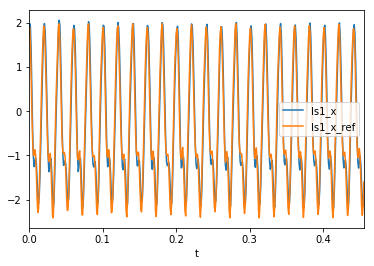

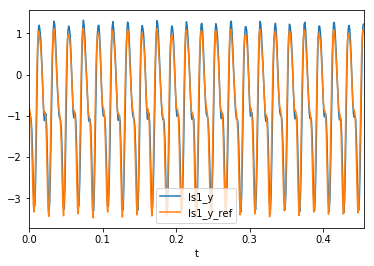

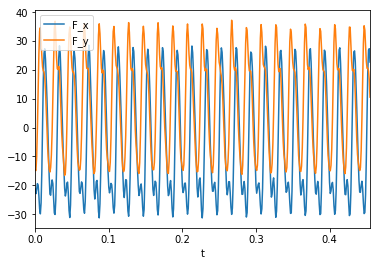

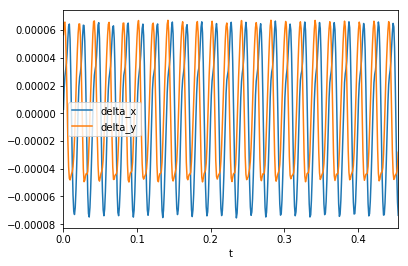

In [288]:

#data.filter(regex="^wrm$").plot()
#data.filter(regex="^we$").plot()
#data.filter(regex="^wsl$").plot()
#data.filter(regex="^theta_e|theta_rm$").plot()
#data.filter(regex="^theta_rm$").plot()
#data.filter(regex="^Itq_d_ref|Itq_d$").plot()
#data.filter(regex="^Itq_q_ref|Itq_q$").plot()
data.filter(regex="^Is1_x_ref|Is1_x$").plot()
data.filter(regex="^Is1_y_ref|Is1_y$").plot()

#data.filter(regex="^va1_ref|vb1_ref|vc1_ref$").plot()
#data.filter(regex="^va2_ref|vb2_ref|vc2_ref$").plot()
#data.filter(regex="^Te$").plot()
data.filter(regex="^F_x|F_y$").plot()
data.filter(regex="^delta_x|delta_y$").plot()
#data.filter(regex="^error_x|error_y$").plot()
#data.filter(regex="^delta_x|delta_y|delta_x_ref|delta_y_ref|delta_x_ref_lpf|delta_y_ref_lpf$").plot()

In [ ]:
#cmd.BIM_enable_vctrl()

cmd.BIM_set_w(1000*PI/30)
#cmd.BIM_set_id(10)

In [ ]:
cmd.BIM_set_ixy(0, 3)


In [ ]:
cmd.BIM_enable_vctrl()
cmd.BIM_set_id(6)


In [289]:
cmd.BIM_disable_levctrl()
cmd.BIM_disable_vctrl()

	> BIM disable_levctrl
['BIM disable_levctrl', 'SUCCESS']
	> BIM disable_vctrl
['BIM disable_vctrl', 'SUCCESS']


In [290]:
cmd.disable_pwm()


	> hw pwm off
['hw pwm off', 'SUCCESS']


In [ ]:
amdc.disconnect()
#amdc.connect()

## Logging


In [291]:
import glob, os
from pandas import *
import matplotlib.pyplot as plt
import numpy as np
import time
import pathlib as pl
import sys
repo_dir = '..'                                      # CHANGE THIS TO YOUR REPO DIRECTORY
repo_dir = pl.Path(repo_dir)


In [292]:
for file in glob.glob("*.csv"):
    print(file)


BIM_data_2000RPM_2021-10-05_H13-M31-S05.csv
BIM_data_2500RPM_2021-10-05_H12-M57-S20.csv
BIM_data_2500RPM_2021-10-05_H13-M32-S14.csv
BIM_data_2500RPM_2021-10-06_H12-M03-S06.csv
BIM_data_3000RPM_2021-10-05_H13-M32-S57.csv
BIM_data_3000RPM_2021-10-05_H13-M42-S47.csv
BIM_data_3000RPM_2021-10-06_H12-M03-S55.csv
BIM_data_delta1000_2021-10-04_H14-M30-S06.csv
BIM_data_delta1500_2021-10-04_H14-M30-S49.csv
BIM_data_delta2000_2021-10-04_H14-M31-S33.csv
BIM_data_delta2500_2021-10-04_H15-M20-S48.csv
BIM_data_delta2500_2021-10-04_H15-M21-S42.csv
BIM_data_deltastart_2021-10-04_H14-M49-S04.csv
BIM_data_deltastart_2021-10-04_H14-M50-S47.csv
BIM_data_deltastart_2021-10-04_H14-M52-S25.csv
BIM_data_deltastart_2021-10-04_H15-M18-S44.csv
BIM_data_deltastart_2021-10-04_H15-M46-S45.csv
BIM_data_deltastart_2021-10-04_H15-M51-S42.csv
BIM_data_deltastart_2021-10-04_H16-M10-S50.csv
BIM_data_deltastart_2021-10-04_H16-M12-S35.csv
BIM_data_deltastart_2021-10-04_H16-M15-S07.csv
BIM_data_deltastart_2021-10-04_H16-M17-

BIM_data_3000RPM_2021-10-06_H12-M03-S55.csv


<function matplotlib.pyplot.show(*args, **kw)>

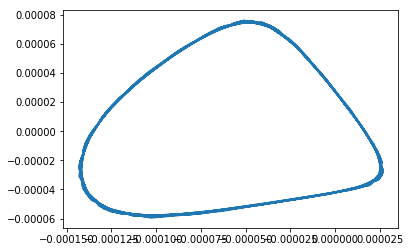

In [295]:
list_of_files = glob.glob('*.csv')
file_name = max(list_of_files, key=os.path.getctime)
print(file_name)

data = read_csv('BIM_data_3000RPM_2021-10-05_H13-M42-S47.csv')

delta_x = data['delta_x'].tolist()
delta_y = data['delta_y'].tolist()

plt.plot(delta_x, delta_y)

plt.show

In [ ]:

from AMDC_Logger import AMDC_Logger, find_mapfile
mapfile_path = find_mapfile(repo_dir)
logger = AMDC_Logger(AMDC = amdc, mapfile = mapfile_path)
logger.sync()

# View which variables are logged
logger.info()
#amdc.connect()
cmd.twin_enable_log()

In [ ]:
logger.unregister_all()
#logger.register('Ia1_a Ia1_b Ia1_c Ib1_a Ib1_b Ib1_c Ia2_a Ia2_b Ia2_c Ib2_a Ib2_b Ib2_c', samples_per_sec = 1000, var_type = 'double')
#logger.register('theta_rm wrm wsl theta_e we Itq_d_ref Itq_q_ref Itq_d Itq_q Te', samples_per_sec = 1000, var_type = 'double')
logger.register('theta_rm theta_e wrm', samples_per_sec = 1000, var_type = 'double')



# View which variables are logged
logger.info()

###################   COLLECT DATA   ####################
# Clear the logger, then record data
logger.clear_all()
logger.start()


In [ ]:

#DATA IS BEING RECORDED
time.sleep(1)

logger.stop()


In [ ]:
####################   DUMP DATA AND PLOT   ####################
data = logger.dump(file = 'BIM_data_pos.csv')


In [ ]:
data.filter(regex="^wrm$").plot()
#data.filter(regex="^we$").plot()
#data.filter(regex="^wsl$").plot()
data.filter(regex="^theta_e|theta_rm$").plot()
#data.filter(regex="^theta_rm$").plot()
#data.filter(regex="^Itq_d_ref|Itq_d$").plot()
#data.filter(regex="^Itq_q_ref|Itq_q$").plot()
#data.filter(regex="^Te$").plot()


In [ ]:

####################   DUMP DATA AND PLOT   ####################
data = logger.dump(file = 'BIM_data_pos.csv')
#data


In [ ]:
data.filter(regex="^wrm$").plot()
#data.filter(regex="^we$").plot()
data.filter(regex="^wsl$").plot()
data.filter(regex="^theta_e|theta_rm$").plot()
#data.filter(regex="^theta_rm$").plot()
data.filter(regex="^Itq_d_ref|Itq_d$").plot()
data.filter(regex="^Itq_q_ref|Itq_q$").plot()
data.filter(regex="^Te$").plot()


In [ ]:
logger.unregister_all()
logger.register('Iabc1_a Iabc1_b Iabc1_c', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
#time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data_Iabc.csv')
#data

data.filter(regex="^Iabc1_a|Iabc1_b|Iabc1_c$").plot()

In [ ]:
logger.unregister_all()
#logger.register('Itq_d_ref Itq_q_ref Itq_d Itq_q Is1_d_ref Is1_q_ref Is1_d Is1_q Is2_d_ref Is2_q_ref Is2_d Is2_q', samples_per_sec = 1000, var_type = 'double')
logger.register('va_ref vb_ref vc_ref', samples_per_sec = 1000, var_type = 'double')
# View which variables are logged
logger.info()

logger.clear_all()
logger.start()
time.sleep(0.5)
logger.stop()

data = logger.dump(file = 'BIM_data_Idq.csv')
#data

data.filter(regex="^va_ref|vb_ref|vc_ref$").plot()
#data.filter(regex="^Itq_q_ref|Itq_q$").plot()
#data.filter(regex="^Te_ref$").plot()

In [ ]:
data.filter(regex="^Ib1_a|Ib1_b|Ib1_c$").plot()

In [ ]:
data.filter(regex="^Iabc2_a|Iabc2_b|Iabc2_c$").plot()

In [ ]:
data.filter(regex="^Iabc3_a|Iabc3_b|Iabc3_c$").plot()

In [ ]:
logger.unregister_all()
logger.register('vabc1_a vabc1_b vabc1_c', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data.csv')
data

data.filter(regex="^vabc1_a|vabc1_b|vabc1_c$").plot()

In [ ]:

data = logger.dump(file = 'BIM_data.csv')
data


In [ ]:
data.filter(regex="^Itq_d_ref|Itq_q_ref|Itq_d$|Itq_q").plot()
#data.filter(regex="^Is1_d_ref|Is1_q_ref|Is1_d|Is1_q$").plot()
#data.filter(regex="^Is2_d_ref|Is2_q_ref|Is2_d|Is2_q$").plot()

In [ ]:
logger.unregister_all()
logger.register('Is1_d_ref Is1_q_ref Is1_d Is1_q', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()


In [ ]:
#data = logger.dump(file = 'test_data.csv')
#data
data.filter(regex="^Is1_d_ref|Is1_q_ref|Is1_d|Is1_q$").plot()

In [ ]:
logger.unregister_all()
logger.register('Is2_d_ref Is2_q_ref Is2_d Is2_q', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data.csv')
data

data.filter(regex="^Is2_d_ref|Is2_q_ref|Is2_d|Is2_q$").plot()

In [ ]:

logger.unregister_all()
logger.register('v_tq_d v_tq_q', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data.csv')
data

data.filter(regex="^v_tq_d|v_tq_q$").plot()

In [ ]:
logger.unregister_all()
logger.register('we_tq', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data.csv')
data

data.filter(regex="^we_tq$").plot()